# Wykrywanie naczyń dna oka

## Imports

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Constants

In [5]:
ORIGINAL_PHOTO_NAME = "photos/Image_01L.jpg"

## Functions

In [21]:
def loadPicture():
    #picture = cv2.imread(os.getcwd() + "/" + ORIGINAL_PHOTO_NAME)
    picture = cv2.imread(ORIGINAL_PHOTO_NAME)
    picture = cv2.cvtColor(picture, cv2.COLOR_RGB2BGR)
    return picture

In [32]:
def showPicture(base, picture):
    fig = plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(picture)
    plt.subplot(1,2,2)
    plt.imshow(picture)

## Main

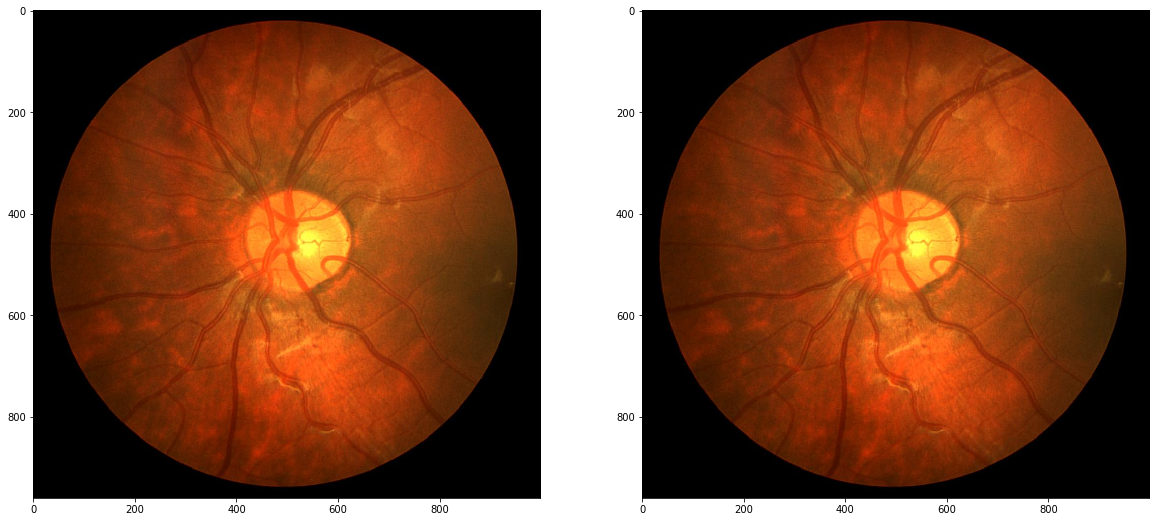

In [33]:
picture = loadPicture()
showPicture(picture, picture)